# 효자동 인구 분포와 비슷한 동네 찾기

<br/>
<br/>
<br/>
<br/>

## 모듈 import

In [23]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
display(HTML('<style>.container {width : 100%; !important;}</style>'))

<br/>
<br/>
<br/>
<br/>

In [33]:
# 출력되는 최대 행, 열 수 설정
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 110

## 데이터 로드

In [34]:
# 202201_202201_연령별인구현황_월간.csv 파일을 읽으세요. (encoding = 'cp949', thousands = ',')
df = pd.read_csv("./202201_202201_연령별인구현황_월간.csv", encoding="cp949", thousands=",")
df

,행정구역,2022년01월_계_총인구수,2022년01월_계_연령구간인구수,2022년01월_계_0세,2022년01월_계_1세,2022년01월_계_2세,2022년01월_계_3세,2022년01월_계_4세,2022년01월_계_5세,2022년01월_계_6세,2022년01월_계_7세,2022년01월_계_8세,2022년01월_계_9세,2022년01월_계_10세,2022년01월_계_11세,2022년01월_계_12세,2022년01월_계_13세,2022년01월_계_14세,2022년01월_계_15세,2022년01월_계_16세,2022년01월_계_17세,2022년01월_계_18세,2022년01월_계_19세,2022년01월_계_20세,2022년01월_계_21세,2022년01월_계_22세,2022년01월_계_23세,2022년01월_계_24세,2022년01월_계_25세,2022년01월_계_26세,2022년01월_계_27세,2022년01월_계_28세,2022년01월_계_29세,2022년01월_계_30세,2022년01월_계_31세,2022년01월_계_32세,2022년01월_계_33세,2022년01월_계_34세,2022년01월_계_35세,2022년01월_계_36세,2022년01월_계_37세,2022년01월_계_38세,2022년01월_계_39세,2022년01월_계_40세,2022년01월_계_41세,2022년01월_계_42세,2022년01월_계_43세,2022년01월_계_44세,2022년01월_계_45세,2022년01월_계_46세,2022년01월_계_47세,2022년01월_계_48세,2022년01월_계_49세,2022년01월_계_50세,2022년01월_계_51세,2022년01월_계_52세,2022년01월_계_53세,2022년01월_계_54세,2022년01월_계_55세,2022년01월_계_56세,2022년01월_계_57세,2022년01월_계_58세,2022년01월_계_59세,2022년01월_계_60세,2022년01월_계_61세,2022년01월_계_62세,2022년01월_계_63세,2022년01월_계_64세,2022년01월_계_65세,2022년01월_계_66세,2022년01월_계_67세,2022년01월_계_68세,2022년01월_계_69세,2022년01월_계_70세,2022년01월_계_71세,2022년01월_계_72세,2022년01월_계_73세,2022년01월_계_74세,2022년01월_계_75세,2022년01월_계_76세,2022년01월_계_77세,2022년01월_계_78세,2022년01월_계_79세,2022년01월_계_80세,2022년01월_계_81세,2022년01월_계_82세,2022년01월_계_83세,2022년01월_계_84세,2022년01월_계_85세,2022년01월_계_86세,2022년01월_계_87세,2022년01월_계_88세,2022년01월_계_89세,2022년01월_계_90세,2022년01월_계_91세,2022년01월_계_92세,2022년01월_계_93세,2022년01월_계_94세,2022년01월_계_95세,2022년01월_계_96세,2022년01월_계_97세,2022년01월_계_98세,2022년01월_계_99세,2022년01월_계_100세 이상
0,서울특별시 (1100000000),9505926,9505926,42645,44681,48381,51247,55310,62274,67281,66873,66661,74399,71449,73835,69313,73703,79547,73622,70251,77776,81670,83857,95917,115378,118511,129050,141911,150535,161714,166575,167541,170249,166431,150475,143925,140786,135953,133632,134593,133003,144921,153538,156172,152618,152377,131409,138629,136992,139933,152154,157904,161671,169107,166264,161177,158926,147942,137178,142635,143150,134226,146362,149673,156765,146454,136248,134784,123300,128745,113207,96466,104109,74383,80372,81939,79652,81304,68386,55844,57185,54648,63906,52751,42472,40589,35238,30475,26724,23411,18922,15287,12578,9780,8058,6842,5404,4061,2714,1866,1368,1237,857,1683
1,서울특별시 종로구 (1111000000),144543,144543,469,477,576,544,638,746,855,836,814,974,897,1013,933,988,1119,1029,937,1083,1062,1264,1599,1840,1989,2119,2357,2487,2665,2545,2597,2519,2418,2225,1945,1884,1854,1744,1776,1722,1918,2020,2077,2097,2123,1785,1848,1916,1971,2195,2406,2467,2753,2688,2623,2568,2478,2276,2389,2419,2294,2478,2451,2559,2254,2103,2147,1963,2023,1782,1483,1620,1169,1188,1288,1258,1377,1084,986,1066,1018,1216,1029,831,887,748,612,575,497,410,335,279,215,173,147,110,92,77,49,29,24,26,35
2,서울특별시 종로구 청운효자동(1111051500),11941,11941,42,52,53,57,67,72,101,84,85,112,105,110,113,119,137,130,93,125,101,120,123,152,141,162,136,172,162,162,145,187,174,150,139,149,143,152,152,165,156,196,210,222,225,181,177,198,219,208,238,204,224,213,228,209,199,184,176,159,166,162,170,167,160,156,146,126,138,116,104,123,82,99,105,85,111,91,90,94,82,99,78,69,77,72,56,51,39,34,30,18,22,9,10,10,5,5,5,2,3,2,2
3,서울특별시 종로구 사직동(1111053000),9349,9349,42,25,44,35,52,67,81,68,67,71,68,66,59,75,71,68,62,73,66,66,75,79,98,101,101,115,140,153,159,171,176,164,137,149,145,112,121,141,149,154,163,148,123,126,149,148,157,139,146,169,147,188,173,162,160,125,139,148,150,144,143,147,151,143,136,115,112,95,81,96,60,61,85,70,83,57,57,77,66,84,74,65,55,58,50,45,40,41,26,20,17,11,18,9,8,6,8,4,2,2,1
4,서울특별시 종로구 삼청동(1111054000),2457,2457,5,6,5,5,16,6,19,5,18,15,16,13,22,17,22,21,17,15,19,10,25,22,26,29,42,25,44,29,34,43,25,32,34,38,22,27,26,31,32,42,37,42,47,32,33,24,26,30,36,35,42,39,36,43,39,25,46,39,33,45,49,33,48,47,46,33,39,44,32,36,16,24,31,31,34,22,18,22,19,27,22,22,18,11,14,18,15,8,9,12,5,4,5,4,2,2,0,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<br/>
<br/>
<br/>
<br/>

## 데이터 정보 조회

In [35]:
# 행과 열의 개수를 구하세요.
df.shape

(3870, 104)

In [36]:
# 컬럼명을 조회하세요.
df.columns

Index(['행정구역', '2022년01월_계_총인구수', '2022년01월_계_연령구간인구수', '2022년01월_계_0세',
       '2022년01월_계_1세', '2022년01월_계_2세', '2022년01월_계_3세', '2022년01월_계_4세',
       '2022년01월_계_5세', '2022년01월_계_6세',
       ...
       '2022년01월_계_91세', '2022년01월_계_92세', '2022년01월_계_93세', '2022년01월_계_94세',
       '2022년01월_계_95세', '2022년01월_계_96세', '2022년01월_계_97세', '2022년01월_계_98세',
       '2022년01월_계_99세', '2022년01월_계_100세 이상'],
      dtype='object', length=104)

In [37]:
# 세번째 컬럼 명 부터 슬라이싱하여 cols에 저장하세요. (인구 분포를 확인할 컬럼)
cols = df.columns[3:]
cols

Index(['2022년01월_계_0세', '2022년01월_계_1세', '2022년01월_계_2세', '2022년01월_계_3세',
       '2022년01월_계_4세', '2022년01월_계_5세', '2022년01월_계_6세', '2022년01월_계_7세',
       '2022년01월_계_8세', '2022년01월_계_9세',
       ...
       '2022년01월_계_91세', '2022년01월_계_92세', '2022년01월_계_93세', '2022년01월_계_94세',
       '2022년01월_계_95세', '2022년01월_계_96세', '2022년01월_계_97세', '2022년01월_계_98세',
       '2022년01월_계_99세', '2022년01월_계_100세 이상'],
      dtype='object', length=101)

<br/>
<br/>
<br/>
<br/>

In [42]:
# 원하는 값이 들어있는 행 선택
df["행정구역"][1000:2000]
b = df['행정구역'].str.contains("효자동")
df[b]

,행정구역,2022년01월_계_총인구수,2022년01월_계_연령구간인구수,2022년01월_계_0세,2022년01월_계_1세,2022년01월_계_2세,2022년01월_계_3세,2022년01월_계_4세,2022년01월_계_5세,2022년01월_계_6세,2022년01월_계_7세,2022년01월_계_8세,2022년01월_계_9세,2022년01월_계_10세,2022년01월_계_11세,2022년01월_계_12세,2022년01월_계_13세,2022년01월_계_14세,2022년01월_계_15세,2022년01월_계_16세,2022년01월_계_17세,2022년01월_계_18세,2022년01월_계_19세,2022년01월_계_20세,2022년01월_계_21세,2022년01월_계_22세,2022년01월_계_23세,2022년01월_계_24세,2022년01월_계_25세,2022년01월_계_26세,2022년01월_계_27세,2022년01월_계_28세,2022년01월_계_29세,2022년01월_계_30세,2022년01월_계_31세,2022년01월_계_32세,2022년01월_계_33세,2022년01월_계_34세,2022년01월_계_35세,2022년01월_계_36세,2022년01월_계_37세,2022년01월_계_38세,2022년01월_계_39세,2022년01월_계_40세,2022년01월_계_41세,2022년01월_계_42세,2022년01월_계_43세,2022년01월_계_44세,2022년01월_계_45세,2022년01월_계_46세,2022년01월_계_47세,2022년01월_계_48세,2022년01월_계_49세,2022년01월_계_50세,2022년01월_계_51세,2022년01월_계_52세,2022년01월_계_53세,2022년01월_계_54세,2022년01월_계_55세,2022년01월_계_56세,2022년01월_계_57세,2022년01월_계_58세,2022년01월_계_59세,2022년01월_계_60세,2022년01월_계_61세,2022년01월_계_62세,2022년01월_계_63세,2022년01월_계_64세,2022년01월_계_65세,2022년01월_계_66세,2022년01월_계_67세,2022년01월_계_68세,2022년01월_계_69세,2022년01월_계_70세,2022년01월_계_71세,2022년01월_계_72세,2022년01월_계_73세,2022년01월_계_74세,2022년01월_계_75세,2022년01월_계_76세,2022년01월_계_77세,2022년01월_계_78세,2022년01월_계_79세,2022년01월_계_80세,2022년01월_계_81세,2022년01월_계_82세,2022년01월_계_83세,2022년01월_계_84세,2022년01월_계_85세,2022년01월_계_86세,2022년01월_계_87세,2022년01월_계_88세,2022년01월_계_89세,2022년01월_계_90세,2022년01월_계_91세,2022년01월_계_92세,2022년01월_계_93세,2022년01월_계_94세,2022년01월_계_95세,2022년01월_계_96세,2022년01월_계_97세,2022년01월_계_98세,2022년01월_계_99세,2022년01월_계_100세 이상
2,서울특별시 종로구 청운효자동(1111051500),11941,11941,42,52,53,57,67,72,101,84,85,112,105,110,113,119,137,130,93,125,101,120,123,152,141,162,136,172,162,162,145,187,174,150,139,149,143,152,152,165,156,196,210,222,225,181,177,198,219,208,238,204,224,213,228,209,199,184,176,159,166,162,170,167,160,156,146,126,138,116,104,123,82,99,105,85,111,91,90,94,82,99,78,69,77,72,56,51,39,34,30,18,22,9,10,10,5,5,5,2,3,2,2
1533,경기도 고양시 덕양구 효자동(4128156000),15581,15581,136,152,182,193,234,287,264,244,188,193,183,129,129,111,107,100,83,92,104,100,116,156,128,151,174,150,221,205,211,243,223,246,282,278,289,291,342,335,363,408,406,339,313,259,234,242,231,252,224,199,207,198,207,223,192,190,208,208,191,187,212,193,212,164,158,150,185,126,122,142,72,74,97,106,86,69,54,78,58,72,64,50,59,45,31,39,29,14,16,17,15,12,10,5,5,1,2,0,1,0,3


## 데이터 타입 변경

In [21]:
# 각 열 별 데이터 타입을 조회하세요.
df.dtypes

행정구역                  object
2022년01월_계_총인구수        int64
2022년01월_계_연령구간인구수     int64
2022년01월_계_0세          int64
2022년01월_계_1세          int64
2022년01월_계_2세          int64
2022년01월_계_3세          int64
2022년01월_계_4세          int64
2022년01월_계_5세          int64
2022년01월_계_6세          int64
2022년01월_계_7세          int64
2022년01월_계_8세          int64
2022년01월_계_9세          int64
2022년01월_계_10세         int64
2022년01월_계_11세         int64
2022년01월_계_12세         int64
2022년01월_계_13세         int64
2022년01월_계_14세         int64
2022년01월_계_15세         int64
2022년01월_계_16세         int64
2022년01월_계_17세         int64
2022년01월_계_18세         int64
2022년01월_계_19세         int64
2022년01월_계_20세         int64
2022년01월_계_21세         int64
2022년01월_계_22세         int64
2022년01월_계_23세         int64
2022년01월_계_24세         int64
2022년01월_계_25세         int64
2022년01월_계_26세         int64
2022년01월_계_27세         int64
2022년01월_계_28세         int64
2022년01월_계_29세         int64
2022년01월_계_30세         int64
2022년01월_계_31세

<br/>
<br/>
<br/>
<br/>

## 효자동과 사직동 인구 분포의 차이
- 두 지역의 각 열 별 차이를 구한 뒤
- 각 차이의 제곱의 합을 더한 값을 error라 정의한다.
- 두 지역의 error가 작을수록 인구 분포가 비슷하다고 정의한다.

In [43]:
# 2번 행(효자동 행), cols 컬럼을 선택하여 flag에 저장하세요.
flag = df.loc[2][cols]
flag

2022년01월_계_0세          42
2022년01월_계_1세          52
2022년01월_계_2세          53
2022년01월_계_3세          57
2022년01월_계_4세          67
2022년01월_계_5세          72
2022년01월_계_6세         101
2022년01월_계_7세          84
2022년01월_계_8세          85
2022년01월_계_9세         112
2022년01월_계_10세        105
2022년01월_계_11세        110
2022년01월_계_12세        113
2022년01월_계_13세        119
2022년01월_계_14세        137
2022년01월_계_15세        130
2022년01월_계_16세         93
2022년01월_계_17세        125
2022년01월_계_18세        101
2022년01월_계_19세        120
2022년01월_계_20세        123
2022년01월_계_21세        152
2022년01월_계_22세        141
2022년01월_계_23세        162
2022년01월_계_24세        136
2022년01월_계_25세        172
2022년01월_계_26세        162
2022년01월_계_27세        162
2022년01월_계_28세        145
2022년01월_계_29세        187
2022년01월_계_30세        174
2022년01월_계_31세        150
2022년01월_계_32세        139
2022년01월_계_33세        149
2022년01월_계_34세        143
2022년01월_계_35세        152
2022년01월_계_36세        152
2022년01월_계_37세        165
2022년01월_계_3

In [44]:
# 3번 행(사직동 행), cols 컬럼을 선택하여 temp에 저장하세요.
temp = df.iloc[3][cols]
temp

2022년01월_계_0세          42
2022년01월_계_1세          25
2022년01월_계_2세          44
2022년01월_계_3세          35
2022년01월_계_4세          52
2022년01월_계_5세          67
2022년01월_계_6세          81
2022년01월_계_7세          68
2022년01월_계_8세          67
2022년01월_계_9세          71
2022년01월_계_10세         68
2022년01월_계_11세         66
2022년01월_계_12세         59
2022년01월_계_13세         75
2022년01월_계_14세         71
2022년01월_계_15세         68
2022년01월_계_16세         62
2022년01월_계_17세         73
2022년01월_계_18세         66
2022년01월_계_19세         66
2022년01월_계_20세         75
2022년01월_계_21세         79
2022년01월_계_22세         98
2022년01월_계_23세        101
2022년01월_계_24세        101
2022년01월_계_25세        115
2022년01월_계_26세        140
2022년01월_계_27세        153
2022년01월_계_28세        159
2022년01월_계_29세        171
2022년01월_계_30세        176
2022년01월_계_31세        164
2022년01월_계_32세        137
2022년01월_계_33세        149
2022년01월_계_34세        145
2022년01월_계_35세        112
2022년01월_계_36세        121
2022년01월_계_37세        141
2022년01월_계_3

In [10]:
# 두 지역의 각 열 별 차이를 구하세요.
flag.sub(temp)

2022년01월_계_0세          0
2022년01월_계_1세         27
2022년01월_계_2세          9
2022년01월_계_3세         22
2022년01월_계_4세         15
                      ..
2022년01월_계_96세        -3
2022년01월_계_97세        -2
2022년01월_계_98세         1
2022년01월_계_99세         0
2022년01월_계_100세 이상     1
Length: 101, dtype: object

In [11]:
# 위 결과의 값에 제곱을 하세요.
flag.sub(temp)**2

2022년01월_계_0세           0
2022년01월_계_1세         729
2022년01월_계_2세          81
2022년01월_계_3세         484
2022년01월_계_4세         225
                     ... 
2022년01월_계_96세          9
2022년01월_계_97세          4
2022년01월_계_98세          1
2022년01월_계_99세          0
2022년01월_계_100세 이상      1
Length: 101, dtype: object

In [12]:
# 위 결과의 값을 모두 더하세요. (효자동과 사직동의 error)
(flag.sub(temp)**2).sum()

125072

<br/>
<br/>
<br/>
<br/>

## 효자동과 다른 동네의 인구 분포 차이
- 위와 같은 방법으로 효자동을 기준으로 다른 동네와의 error를 구하여 result 리스트에 추가하세요.

In [45]:
result = []

for i in range(len(df)) :
    temp = df.iloc[i][cols]
    result.append((flag.sub(temp)**2).sum())


result

[1182379033357,
 232502184,
 0,
 125072,
 1171780,
 92904,
 577295,
 215391,
 78206,
 795496,
 406460,
 675289,
 408263,
 930736,
 700364,
 312774,
 403578,
 499299,
 329715,
 164995430,
 1181687,
 725084,
 1064304,
 848802,
 763638,
 642722,
 1345442,
 319147,
 224424,
 428965,
 158424,
 119060,
 94938,
 361118,
 101447,
 593218052,
 458949,
 198944,
 353395,
 1447391,
 689340,
 98832,
 116951,
 89377,
 2251715,
 2543056,
 251406,
 472230,
 200801,
 1241426,
 83673,
 215589,
 999059097,
 432076,
 3237044,
 1837328,
 1343389,
 152017,
 1754724,
 198908,
 250495,
 1791342,
 237975,
 3065126,
 543956,
 147774,
 529197,
 183839,
 142572,
 212801,
 1500359657,
 9751553,
 1769614,
 583113,
 1789916,
 536042,
 4327557,
 355545,
 8393372,
 2022558,
 2448663,
 3461538,
 896300,
 2468083,
 2944295,
 4026840,
 1393796460,
 7055174,
 2615462,
 4117240,
 625208,
 4278311,
 3680071,
 9715771,
 5725211,
 1084557,
 578518,
 587396,
 2741512,
 1376414,
 886160,
 1896430581,
 2400180,
 843158,
 304315,

In [14]:
# result 리스트를 pd.Series로 변환하세요.
result = pd.Series(result)
result

0       1182379033357
1           232502184
2                   0
3              125072
4             1171780
            ...      
3865           105116
3866           250581
3867           171922
3868            33522
3869           869752
Length: 3870, dtype: int64

In [15]:
# 값을 기준으로 정렬하세요.
result.sort_values()

2                   0
3868            33522
695             48644
387             52405
3197            57932
            ...      
827      113415101061
3487     139019226541
452      142905747981
0       1182379033357
1276    2406921199175
Length: 3870, dtype: int64

In [46]:
# 3868 행을 조회하세요.
df.loc[3868]

행정구역                  제주특별자치도 서귀포시 중문동(5013061000)
2022년01월_계_총인구수                              11959
2022년01월_계_연령구간인구수                           11959
2022년01월_계_0세                                   64
2022년01월_계_1세                                   72
2022년01월_계_2세                                   86
2022년01월_계_3세                                   79
2022년01월_계_4세                                   74
2022년01월_계_5세                                   91
2022년01월_계_6세                                  112
2022년01월_계_7세                                  105
2022년01월_계_8세                                  133
2022년01월_계_9세                                  148
2022년01월_계_10세                                 129
2022년01월_계_11세                                 140
2022년01월_계_12세                                 131
2022년01월_계_13세                                 119
2022년01월_계_14세                                 127
2022년01월_계_15세                                 104
2022년01월_계_16세                 

## (참고) 시각화

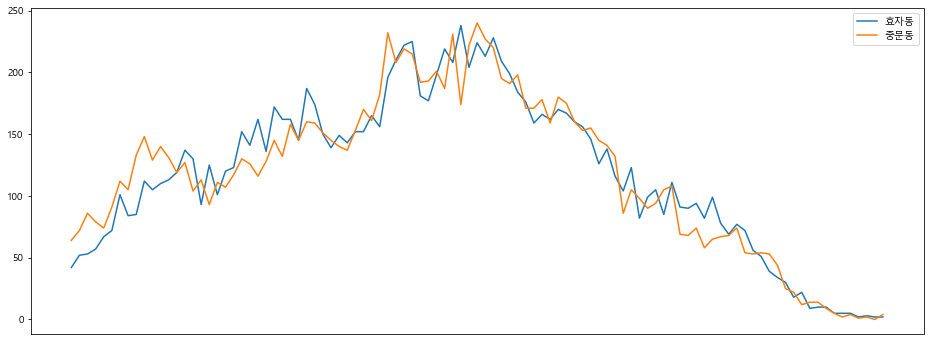

In [119]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (16,6))

plt.plot(flag, label = '효자동')
plt.plot(df.loc[3868, cols], label = '중문동')
plt.legend()
plt.xticks([])
plt.show()